# TEAM 4 - AIR QUALITY PREDICTION

## Importing the libraries and loading the data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [3]:
#Loading the file
filepath = r"C:\Users\adhir\OneDrive\Desktop\Adhira\737\daily_44201_2022.csv"
df = pd.read_csv(filepath)

In [4]:
df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,35,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,50,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,51,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,40,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
4,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,77,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08


# Discriptive Statistics for the data

In [5]:
# Display the descriptive statistics
df.describe()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code
count,233601.000000,233601.000000,233601.000000,233601.0,233601.000000,233601.000000,233601.000000,233601.000000,233601.000000,233601.000000,233601.000000,233601.000000,233601.000000,0.0
mean,27.510824,76.674882,1352.687934,44201.0,1.092371,37.785097,-94.394857,16.791880,98.789843,0.034265,0.042542,10.799046,41.095265,NaN
std,16.518729,79.665965,2713.754708,0.0,0.358584,4.910066,15.628597,1.253237,7.305170,0.009969,0.010775,3.085993,14.863765,NaN
min,1.000000,1.000000,1.000000,44201.0,1.000000,18.216038,-158.088613,1.000000,6.000000,0.000000,0.000000,7.000000,0.000000,NaN
25%,12.000000,23.000000,6.000000,44201.0,1.000000,34.210169,-107.977567,17.000000,100.000000,0.027588,0.036000,9.000000,33.000000,NaN
50%,27.000000,59.000000,23.000000,44201.0,1.000000,38.587525,-90.521944,17.000000,100.000000,0.034412,0.042000,10.000000,39.000000,NaN
75%,40.000000,103.000000,1012.000000,44201.0,1.000000,41.247486,-82.100646,17.000000,100.000000,0.041000,0.049000,11.000000,45.000000,NaN
max,80.000000,800.000000,9997.000000,44201.0,6.000000,64.845690,-66.150615,17.000000,100.000000,0.124765,0.166000,23.000000,264.000000,NaN


In [6]:
# Display the descriptive statistics for selected colums
selected_stats = df[['Arithmetic Mean', 'AQI', '1st Max Value', '1st Max Hour']].describe(percentiles=[.25, .75])
print(selected_stats)


       Arithmetic Mean            AQI  1st Max Value   1st Max Hour
count    233601.000000  233601.000000  233601.000000  233601.000000
mean          0.034265      41.095265       0.042542      10.799046
std           0.009969      14.863765       0.010775       3.085993
min           0.000000       0.000000       0.000000       7.000000
25%           0.027588      33.000000       0.036000       9.000000
50%           0.034412      39.000000       0.042000      10.000000
75%           0.041000      45.000000       0.049000      11.000000
max           0.124765     264.000000       0.166000      23.000000


In [7]:
# count the number of unique states, county and stations
unique_states = df['State Name'].nunique()
unique_counties = df['County Name'].nunique()
unique_station = df['Local Site Name'].nunique()

# Print the results
print(f"Number of Unique States: {unique_states}")
print(f"Number of Unique Counties: {unique_counties}")
print(f"Number of Unique station: {unique_station}")

Number of Unique States: 53
Number of Unique Counties: 609
Number of Unique station: 1151


# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233601 entries, 0 to 233600
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           233601 non-null  int64  
 1   County Code          233601 non-null  int64  
 2   Site Num             233601 non-null  int64  
 3   Parameter Code       233601 non-null  int64  
 4   POC                  233601 non-null  int64  
 5   Latitude             233601 non-null  float64
 6   Longitude            233601 non-null  float64
 7   Datum                233601 non-null  object 
 8   Parameter Name       233601 non-null  object 
 9   Sample Duration      233601 non-null  object 
 10  Pollutant Standard   233601 non-null  object 
 11  Date Local           233601 non-null  object 
 12  Units of Measure     233601 non-null  object 
 13  Event Type           233601 non-null  object 
 14  Observation Count    233601 non-null  int64  
 15  Observation Perce

In [9]:
#Identifying the missing values
missing_values_count = df.isnull().sum()
missing_values_count

State Code                  0
County Code                 0
Site Num                    0
Parameter Code              0
POC                         0
Latitude                    0
Longitude                   0
Datum                       0
Parameter Name              0
Sample Duration             0
Pollutant Standard          0
Date Local                  0
Units of Measure            0
Event Type                  0
Observation Count           0
Observation Percent         0
Arithmetic Mean             0
1st Max Value               0
1st Max Hour                0
AQI                         0
Method Code            233601
Method Name                 0
Local Site Name          7553
Address                   181
State Name                  0
County Name                 0
City Name                   0
CBSA Name               26354
Date of Last Change         0
dtype: int64

In [10]:
# Let's get the percentage of Null values
null_perceentages = df.isna().sum().sort_values(ascending=False) / len(df) * 100
null_perceentages

Method Code            100.000000
CBSA Name               11.281630
Local Site Name          3.233291
Address                  0.077483
State Code               0.000000
Observation Percent      0.000000
City Name                0.000000
County Name              0.000000
State Name               0.000000
Method Name              0.000000
AQI                      0.000000
1st Max Hour             0.000000
1st Max Value            0.000000
Arithmetic Mean          0.000000
Observation Count        0.000000
County Code              0.000000
Event Type               0.000000
Units of Measure         0.000000
Date Local               0.000000
Pollutant Standard       0.000000
Sample Duration          0.000000
Parameter Name           0.000000
Datum                    0.000000
Longitude                0.000000
Latitude                 0.000000
POC                      0.000000
Parameter Code           0.000000
Site Num                 0.000000
Date of Last Change      0.000000
dtype: float64

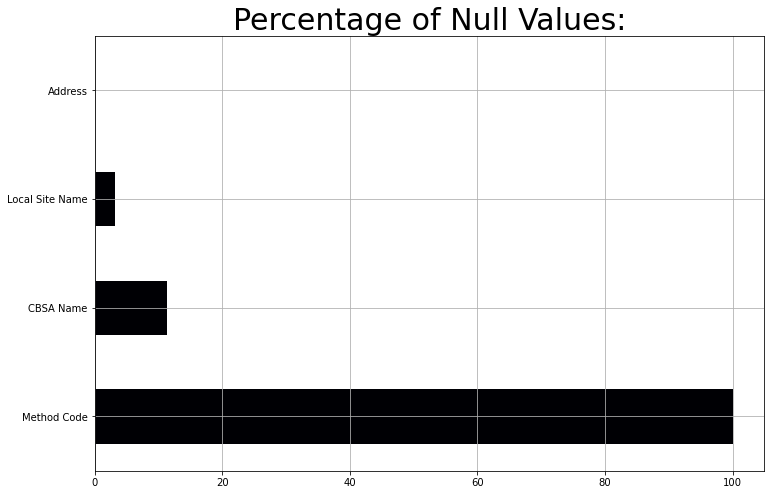

In [11]:
# Plot a bar chat to see the missing peercentage
plt.title("Percentage of Null Values:" , fontsize=30)
null_perceentages[null_perceentages != 0].plot(figsize=(12,8),kind='barh',grid=True,cmap='inferno');

In this dataset, we observe that the 'Method Code' column is entirely missing, and the 'CBSC Name' column has over 10% missing data. Additionally, the 'Local Site Name' column has 3% missing data. It is better to remove the 'Method Code' column since it contains no useful information for our data analysis. Normally, if our columns contained numeric values, we would have considered using the median to fill in missing data. However, all our columns are non-numeric, so it's more appropriate to drop both the 'Site Name' and 'CBSA Name' columns. 

In [12]:
# Remove Unwanted columns which are not used for analysis

df1 = df.drop(['Method Code','State Code', 'County Code', 'Site Num', 'Parameter Code','Sample Duration','Pollutant Standard', 'Units of Measure' ,'Method Name'], axis = 'columns')


In [13]:
df2 = df1.dropna()
df2.isnull().sum()

POC                    0
Latitude               0
Longitude              0
Datum                  0
Parameter Name         0
Date Local             0
Event Type             0
Observation Count      0
Observation Percent    0
Arithmetic Mean        0
1st Max Value          0
1st Max Hour           0
AQI                    0
Local Site Name        0
Address                0
State Name             0
County Name            0
City Name              0
CBSA Name              0
Date of Last Change    0
dtype: int64

In [14]:
#Rename some columns which are not clear enough

df3 = df2.rename(columns={
    'Arithmetic Mean': 'Mean_Ozone_Concentration',
    '1st Max Value': 'Max_Ozone_Value',
    '1st Max Hour': 'Hour_Max_Ozone_Concentration',
    'AQI': 'Air_Quality_Index'
})
df3

,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Event Type,Observation Count,Observation Percent,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,30.497478,-87.880258,NAD83,Ozone,2022-02-28,None,1,6.0,0.038000,0.038,23,35,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
1,1,30.497478,-87.880258,NAD83,Ozone,2022-03-01,None,17,100.0,0.037235,0.054,12,50,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
2,1,30.497478,-87.880258,NAD83,Ozone,2022-03-02,None,17,100.0,0.038235,0.055,12,51,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
3,1,30.497478,-87.880258,NAD83,Ozone,2022-03-03,None,9,53.0,0.024333,0.043,15,40,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
4,1,30.497478,-87.880258,NAD83,Ozone,2022-03-04,None,17,100.0,0.049647,0.063,10,77,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233201,1,18.216038,-67.144107,NAD83,Ozone,2022-06-26,None,17,100.0,0.007000,0.013,9,12,Mayaguez,PR-108,Puerto Rico,Mayagnez,Mayaguez,"Mayaguez, PR",2022-08-24
233202,1,18.216038,-67.144107,NAD83,Ozone,2022-06-27,None,17,100.0,0.011471,0.018,11,17,Mayaguez,PR-108,Puerto Rico,Mayagnez,Mayaguez,"Mayaguez, PR",2022-08-24
233203,1,18.216038,-67.144107,NAD83,Ozone,2022-06-28,None,17,100.0,0.008412,0.016,8,15,Mayaguez,PR-108,Puerto Rico,Mayagnez,Mayaguez,"Mayaguez, PR",2022-08-24
233204,1,18.216038,-67.144107,NAD83,Ozone,2022-06-29,None,17,100.0,0.010412,0.017,10,16,Mayaguez,PR-108,Puerto Rico,Mayagnez,Mayaguez,"Mayaguez, PR",2022-08-24


##  Identifying the Outliers and removing them

In [16]:
#Identifying the outliers using Skewness

print('skewness value of MaxOzone:',df3['Max_Ozone_Value'].skew())
print('skewness value of Hour: ',df3['Hour_Max_Ozone_Concentration'].skew())
print('skewness value of Conc: ',df3['Mean_Ozone_Concentration'].skew())
print('skewness value of AQI: ',df3['Air_Quality_Index'].skew())

skewness value of MaxOzone: 0.21429366653255022
skewness value of Hour:  2.2034422851161417
skewness value of Conc:  0.04521208756109756
skewness value of AQI:  2.394641667707431


The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers. The ‘Hour_Max_Ozone_Concentration’ skewness value of 2.20 shows the variable has been rightly skewed, indicating the presence of outliers.

<AxesSubplot:>

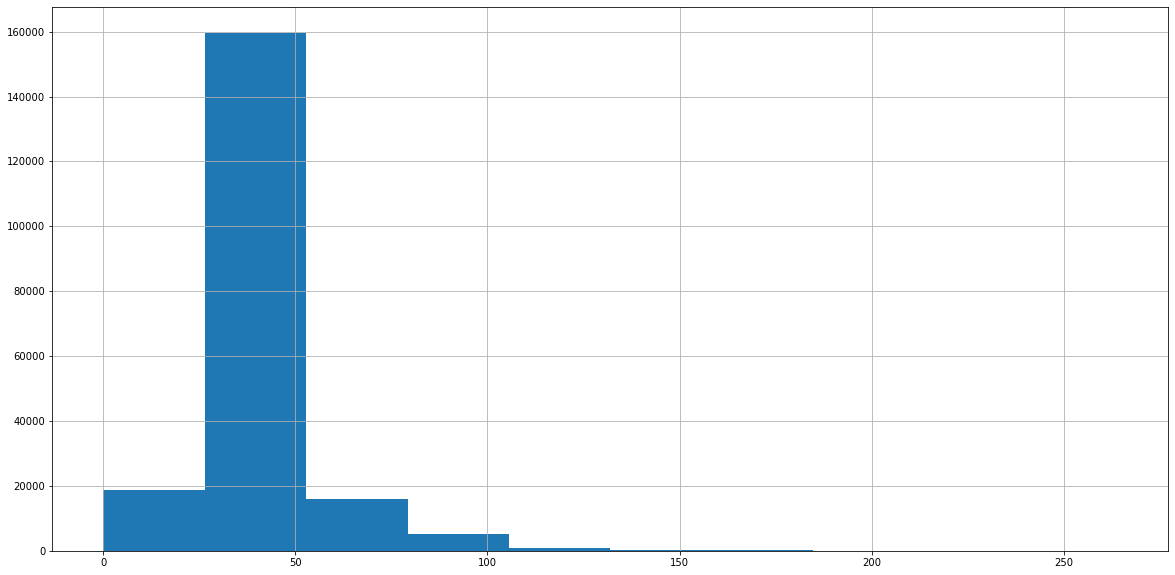

In [17]:
# Visualizing the distribution of a numerical variable using histogram to identify the outlier
df3.Air_Quality_Index.hist()

If the histogram is right-skewed or left-skewed, it indicates the presence of extreme values or outliers. Since this histogram distribution of Air Quality Index is right skewed it represent the presence of outliers

C:\Users\adhir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mean_Ozone_Concentration'>

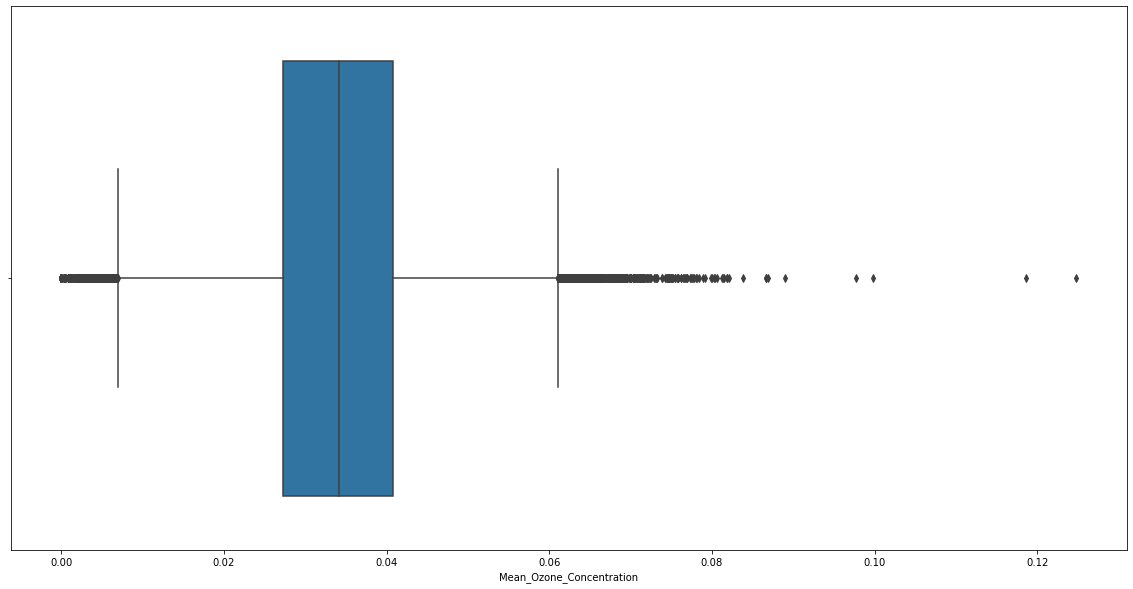

In [18]:
# Visualizing the distribution of Mean Ozone concentration using boxplot to identify the outlier

import seaborn as sns
sns.boxplot(df3['Mean_Ozone_Concentration'],data=df3)

There are data points which fall outside the value range for the Mean ozone concentration. Values above 0.08 are mostly outliers. 

## Removing the outliers

In [19]:
# Removing the outliers by flooring and Capping
Q1 = df3['Mean_Ozone_Concentration'].quantile(0.25)
Q3 = df3['Mean_Ozone_Concentration'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df4 = df3
df4['Mean_Ozone_Concentration']=np.where(df3['Mean_Ozone_Concentration']>upper_whisker,upper_whisker,np.where(df3['Mean_Ozone_Concentration']<lower_whisker,lower_whisker,df3['Mean_Ozone_Concentration']))

We're going to set a minimum value for data points that are too low(flooring), like the bottom 25% of values, and we'll set a maximum value(capping) for data points that are too high, like the top 25% of values. We'll use these percentile values to decide what the minimum and maximum values should be.

C:\Users\adhir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mean_Ozone_Concentration'>

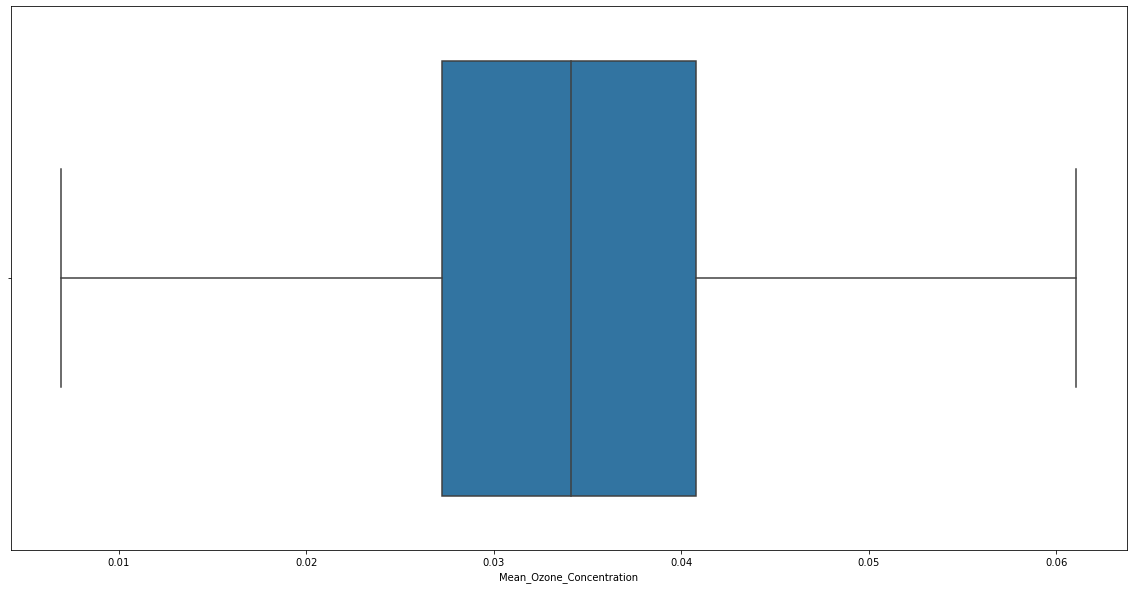

In [20]:
sns.boxplot(df4['Mean_Ozone_Concentration'],data=df4)

We can visualize if the Outliers are removed by the boxplot. Here, the outliers are removed for the Mean Ozone Concentration after applying the flooring and capping technique. 

In [22]:
#Removing the outliers of Hour with Max Ozone Concentration by Flotting and Capping technique

Q1 = df4['Hour_Max_Ozone_Concentration'].quantile(0.25)
Q3 = df4['Hour_Max_Ozone_Concentration'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df4['Hour_Max_Ozone_Concentration']=np.where(df3['Hour_Max_Ozone_Concentration']>upper_whisker,upper_whisker,np.where(df3['Hour_Max_Ozone_Concentration']<lower_whisker,lower_whisker,df3['Hour_Max_Ozone_Concentration']))

In [23]:
# Removing the Outliers of Air Quality Index by Trimming method

Q1 = df4['Air_Quality_Index'].quantile(0.10)
Q3 = df4['Air_Quality_Index'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df4['Air_Quality_Index'][(df4['Air_Quality_Index']>upper_whisker)|(df4['Air_Quality_Index']<lower_whisker)].index
df4.drop(index,inplace=True)

In trimming method we are createing an index for all the outliers  of Air Quality Index and dropping the index values to remove the outliers

<AxesSubplot:>

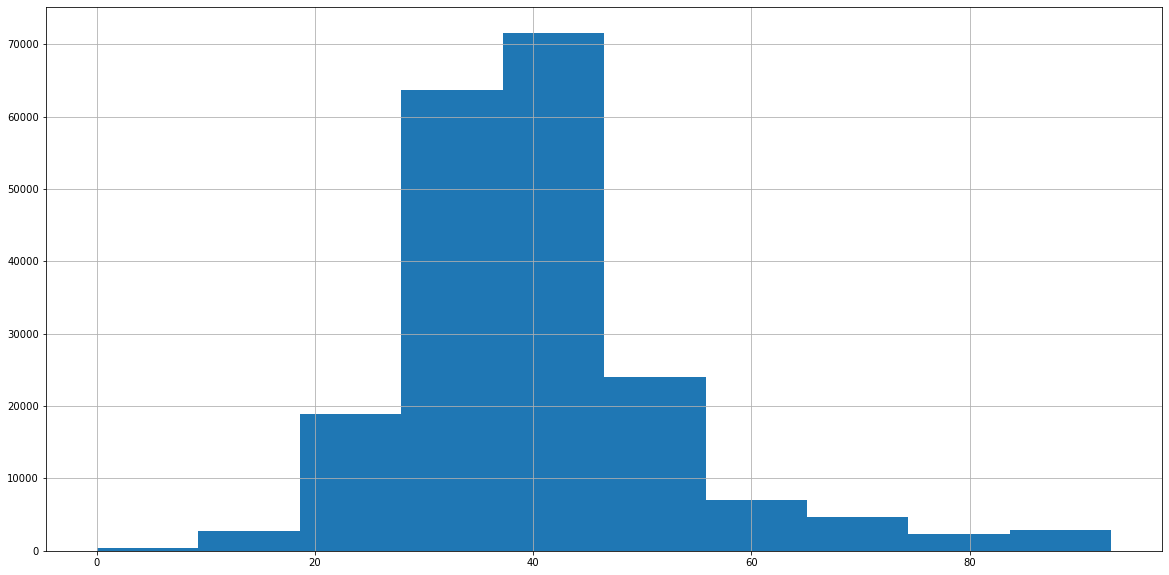

In [24]:
# Visualizing the outliers
df4.Air_Quality_Index.hist()

In [27]:
print('skewness value of MaxOzoneValue: ',df4['Max_Ozone_Value'].skew())
print('skewness value of Max Hour Ozone conc: ',df4['Hour_Max_Ozone_Concentration'].skew())
print('skewness value of Mean Ozone Conc: ',df4['Mean_Ozone_Concentration'].skew())
print('skewness value of AQI: ',df4['Air_Quality_Index'].skew())

skewness value of MaxOzoneValue:  -0.10015791399419781
skewness value of Max Hour Ozone conc:  0.32151852896487493
skewness value of Mean Ozone Conc:  -0.0926007291492704
skewness value of AQI:  1.2116858868554299


The skewness value of the AQI (Air Quality Index) has decreased from a high value of 2.39 to a lower value of 1.21, which is closer to 1. This reduction in skewness suggests that the data distribution is becoming less skewed or more symmetrical.

Similarly, when we removed outliers from the data, the skewness also decreased significantly from 2.20 to a much smaller value of 0.32. This reduction indicates that the data distribution has become more centered between -1 and 1, which is a characteristic of more balanced distribution